In [4]:
! pip install qiskit

In [5]:
! pip install qiskit-machine-learning

In [6]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from qiskit import *

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
#from qiskit.algorithms.optimizers import SPSA

from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

#from qiskit.utils import QuantumInstance
#from qiskit_machine_learning.kernels import QuantumKernel

import random
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('Thesis IBM Dataset.csv')
df.head()

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0.0,1,0,0
1,27-06-2023,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0.0,1,0,0
2,27-06-2023,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1.0,1,0,0
3,27-06-2023,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1.0,1,0,0
4,27-06-2023,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0.0,0,1,0


In [8]:
for col in df.columns:
    if (col == 'Rain'):
       
        df[col] = np.where(df[col] == 0.0, 0, 1)
df

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,27-06-2023,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,27-06-2023,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,27-06-2023,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,27-06-2023,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,31-12-2023,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,31-12-2023,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,31-12-2023,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,31-12-2023,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [9]:
df.drop(columns=['Date'], inplace=True)
#df.drop(columns=['Temperature(C)'], inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [10]:
df.dropna(inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [11]:
df.drop(columns=['Time', 'State','Real State'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny,Fog
0,27,32,21,87,3.0,1003,0,1,0,0
1,27,32,22,86,9.0,1003,0,1,0,0
2,28,34,23,90,3.0,1003,1,1,0,0
3,28,33,30,85,9.0,1003,1,1,0,0
4,27,32,53,90,9.0,1003,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0,0,1,0
4500,19,19,1,80,14.0,1015,0,0,1,0
4501,19,19,2,82,14.0,1015,0,0,1,0
4502,18,18,2,83,14.0,1015,0,0,1,0


In [12]:
df.drop(columns=['Fog'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny
0,27,32,21,87,3.0,1003,0,1,0
1,27,32,22,86,9.0,1003,0,1,0
2,28,34,23,90,3.0,1003,1,1,0
3,28,33,30,85,9.0,1003,1,1,0
4,27,32,53,90,9.0,1003,0,0,1
...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0,0,1
4500,19,19,1,80,14.0,1015,0,0,1
4501,19,19,2,82,14.0,1015,0,0,1
4502,18,18,2,83,14.0,1015,0,0,1


In [13]:
def create_training_and_testing_data_sub(df_, DATA_SIZE_):
    data_size = DATA_SIZE_

    indices = np.random.choice(df.index, size=data_size, replace=False)
    subset_df = df.loc[indices]

    print(indices)

    # get the values from the last column of the subset and store them in y_subset
    y_subset = subset_df['Sunny'].values

    # get the values from all other columns of the subset and store them in X_subset
    x_subset = subset_df.iloc[:, :-1].values

    # spltting the dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size = 0.2, random_state = 31)

    return x_train, x_test, y_train, y_test

In [14]:
NUM_OF_EXPERIMENTS = int(input("Number of experiments to run: "))
DATA_SIZE = int(input("Size of dataset: "))
NUM_MAX_ITER = int(input("Number of max iterations: "))
data = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    X_train, X_test, y_train, y_test = create_training_and_testing_data_sub(df, DATA_SIZE)

    data.append([X_train, X_test, y_train, y_test])

Number of experiments to run:  100
Size of dataset:  200
Number of max iterations:  1


[ 286 3806 3819  493 1523 1277 1218  328 2092  983 1475  717 1876 2387
 3959 4446 1856 3311  680  972 1446 3590 3049 2375 4288 4295  700 1323
 2369 3192 3864 1310 1756 1519 3083 2969 2957 1599  586 1233 2754 2694
  222  787  387 1853 2864 4162  488 2017 1766 2650 2508 1150 2277 4293
  251 1929  568  211  495  301 1701 4137 4010 1333 2491 4163 2011  520
 2177 1272 3099  600 4495 3947 4466 3070 1001 3221 3651 1099 3413 3406
 1470 1864 3136 2936 2113 1356 2830 4053 3972   68 2024 1020 1650 3882
 3789 3510 1050 4156 1718 1196 4092 2671 2018 1772 1464 3836  238 1417
 1832 3401 2465 3687 1558  714  696 2086 3190 4024 3477   21  948 3278
 2918  266  184 3704 2994 3946 3922 3992 1501 2278 2946 2521 1683 1631
 3546  910 1104 2908 2587 3963  335  697 4487 2478 2433 4449  584 1179
 2175  412 1997 2114 1398 2222 3589 4013 1984 1963 3612 1628 4334 1554
 1423 3495  383  452 3395  359  436 1494 1829  865 4218  933 3327 1800
 3696 4212  431 4282  780 4076 3380 2006 4367 3055 3129 3989 2172 1259
 4155 

In [15]:
def find_classical_accuracy(x_train_, x_test_, y_train_, y_test_):

    svc_clf = svm.SVC(random_state = 7)
    svc_clf.fit(x_train_, y_train_)
    labels_pred = svc_clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [16]:
def find_classical_accuracy_dt(x_train_, x_test_, y_train_, y_test_):
    clf = DecisionTreeClassifier(random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train_, y_train)

    # Make predictions on the testing data
    labels_pred = clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [17]:
def find_classical_accuracy_rf(x_train_, x_test_, y_train_, y_test_):
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    rfc.fit(X_train, y_train)


    # Make predictions on the testing data
    labels_pred = rfc.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [18]:
svc_acc = []
svc_bacc = []
svc_f1_score = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy(X_train, X_test, y_train, y_test)
    svc_acc.append(accuracy_svm)
    svc_bacc.append(balanced_accuracy_svm)
    svc_f1_score.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-------------------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.575, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.3, 0.5, 0.46153846153846156
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.525, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.6, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.4, 0.5, 0.0
-----------------------------------------

In [19]:
print(svc_acc)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc).mean())
print("Standard deviation:  ", np.array(svc_acc).std())
print("Minimum Accuracy:    ", np.array(svc_acc).min())
print("Maximum Accuracy:    ", np.array(svc_acc).max())
svc_avg = np.array(svc_acc).mean()
svc_min = np.array(svc_acc).min()
svc_max = np.array(svc_acc).max()

[0.575, 0.3, 0.525, 0.6, 0.4, 0.5, 0.5, 0.575, 0.5, 0.625, 0.45, 0.575, 0.3, 0.375, 0.45, 0.575, 0.6, 0.625, 0.55, 0.575, 0.475, 0.675, 0.45, 0.45, 0.625, 0.525, 0.65, 0.425, 0.525, 0.475, 0.6, 0.55, 0.475, 0.7, 0.575, 0.55, 0.65, 0.525, 0.325, 0.475, 0.575, 0.425, 0.575, 0.6, 0.525, 0.5, 0.575, 0.425, 0.45, 0.525, 0.625, 0.575, 0.575, 0.625, 0.525, 0.625, 0.55, 0.4, 0.425, 0.55, 0.525, 0.525, 0.525, 0.55, 0.75, 0.525, 0.525, 0.45, 0.525, 0.35, 0.525, 0.6, 0.725, 0.65, 0.575, 0.5, 0.575, 0.65, 0.525, 0.6, 0.55, 0.75, 0.525, 0.5, 0.6, 0.575, 0.675, 0.55, 0.425, 0.65, 0.5, 0.625, 0.575, 0.525, 0.475, 0.475, 0.475, 0.425, 0.6, 0.5]
For Classical SVM:
Mean Accuracy:        0.53675
Standard deviation:   0.08834980192394322
Minimum Accuracy:     0.3
Maximum Accuracy:     0.75


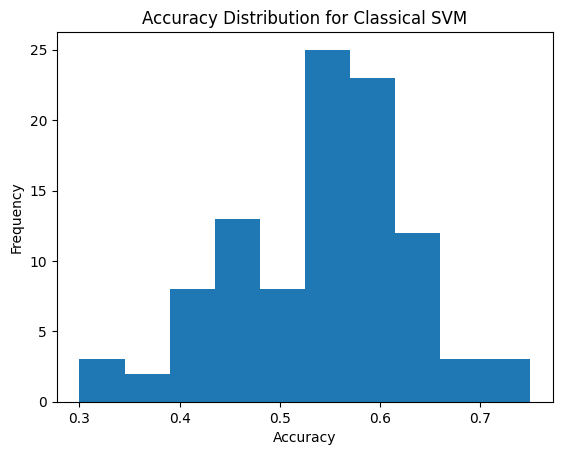

In [20]:
plt.hist(np.array(svc_acc))
plt.title('Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [21]:
print(svc_bacc)
print("For Classical SVM:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc).mean())
print("Standard deviation:  ", np.array(svc_bacc).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc).max())
svc_avg = np.array(svc_bacc).mean()
svc_min = np.array(svc_bacc).min()
svc_max = np.array(svc_bacc).max()

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6136363636363636, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
For Classical SVM:
Mean Balanced Accuracy:        0.5011363636363636
Standard deviation:   0.011306675421666135
Minimum Balanced Accuracy:     0.5
Maximum Balanced Accuracy:     0.6136363636363636


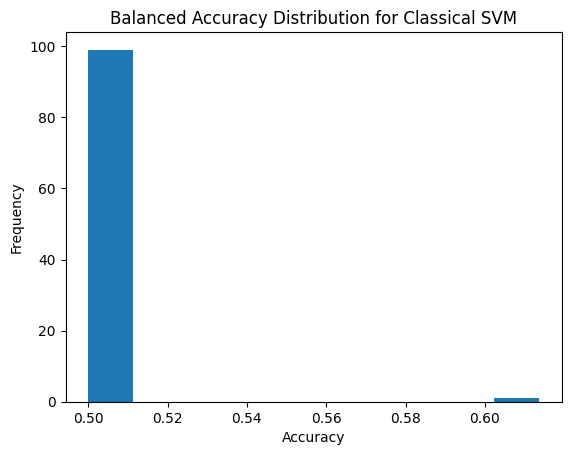

In [22]:
plt.hist(np.array(svc_bacc))
plt.title('Balanced Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [23]:
from sklearn.tree import DecisionTreeClassifier

svc_acc_dt = []
svc_bacc_dt = []
svc_f1_score_dt = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_dt(X_train, X_test, y_train, y_test)
    svc_acc_dt.append(accuracy_svm)
    svc_bacc_dt.append(balanced_accuracy_svm)
    svc_f1_score_dt.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-----------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.948849104859335, 0.9411764705882353
-----------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.875, 0.8869047619047619, 0.8148148148148148
-----------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.9022556390977443, 0.9
-----------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.8854166666666667, 0.8666666666666667
-----------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 

In [24]:
print(svc_acc_dt)
print("For Classical Decision Tree:")
print("Mean Accuracy:       ", np.array(svc_acc_dt).mean())
print("Standard deviation:  ", np.array(svc_acc_dt).std())
print("Minimum Accuracy:    ", np.array(svc_acc_dt).min())
print("Maximum Accuracy:    ", np.array(svc_acc_dt).max())
svc_avg = np.array(svc_acc_dt).mean()
svc_min = np.array(svc_acc_dt).min()
svc_max = np.array(svc_acc_dt).max()

[0.95, 0.875, 0.9, 0.9, 0.9, 0.85, 0.9, 0.8, 0.85, 0.925, 0.925, 0.8, 0.875, 0.925, 0.925, 0.8, 0.95, 0.9, 0.825, 0.85, 0.85, 0.9, 0.95, 0.875, 0.85, 0.8, 0.875, 0.9, 0.825, 0.925, 0.95, 0.85, 0.925, 0.925, 0.925, 0.9, 0.925, 0.925, 0.925, 0.95, 0.925, 0.9, 0.875, 0.85, 0.85, 0.875, 0.875, 0.925, 0.85, 0.825, 0.775, 0.95, 0.8, 0.95, 0.95, 0.85, 0.925, 0.975, 0.9, 0.925, 0.9, 0.825, 0.875, 0.9, 0.875, 0.8, 0.85, 0.9, 0.95, 0.9, 0.975, 0.875, 0.95, 0.875, 0.925, 0.75, 0.925, 0.875, 0.9, 0.9, 0.975, 0.775, 0.8, 0.8, 0.95, 0.9, 0.925, 0.875, 0.95, 0.9, 0.95, 0.95, 0.85, 0.85, 0.85, 0.875, 0.875, 0.975, 0.875, 0.85]
For Classical Decision Tree:
Mean Accuracy:        0.8879999999999998
Standard deviation:   0.05080354318352215
Minimum Accuracy:     0.75
Maximum Accuracy:     0.975


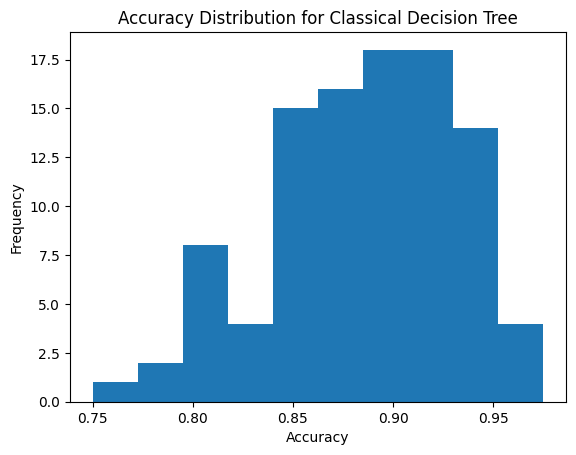

In [25]:
plt.hist(np.array(svc_acc_dt))
plt.title('Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

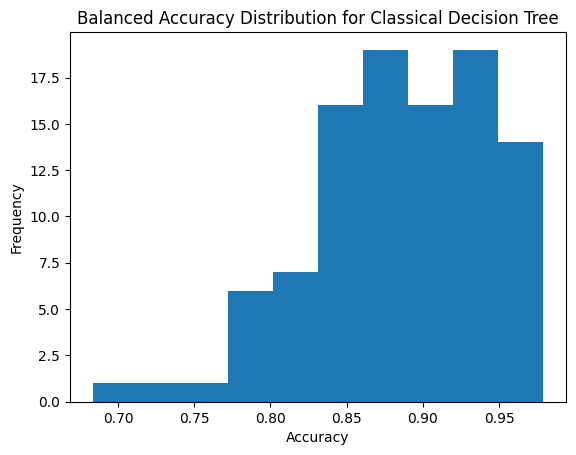

In [26]:
plt.hist(np.array(svc_bacc_dt))
plt.title('Balanced Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [27]:
from sklearn.ensemble import RandomForestClassifier

svc_acc_rf = []
svc_bacc_rf = []
svc_f1_score_rf = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_rf(X_train, X_test, y_train, y_test)
    svc_acc_rf.append(accuracy_svm)
    svc_bacc_rf.append(balanced_accuracy_svm)
    svc_f1_score_rf.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"----------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.925, 0.9194373401534527, 0.9090909090909091
----------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.9285714285714286, 0.8571428571428571
----------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.899749373433584, 0.8947368421052632
----------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.9375, 0.9333333333333333
----------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.925, 0.9270833333333333, 0.9361702127659575
----------------------------------------------------------------
Current experiment no: 6
Accuracy, Balanced Accuracy and F

In [28]:
print(svc_acc_rf)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc_rf).mean())
print("Standard deviation:  ", np.array(svc_acc_rf).std())
print("Minimum Accuracy:    ", np.array(svc_acc_rf).min())
print("Maximum Accuracy:    ", np.array(svc_acc_rf).max())
svc_avg = np.array(svc_acc_rf).mean()
svc_min = np.array(svc_acc_rf).min()
svc_max = np.array(svc_acc_rf).max()

[0.925, 0.9, 0.9, 0.95, 0.925, 0.875, 0.925, 0.875, 0.9, 0.85, 0.925, 0.875, 0.875, 0.9, 0.85, 0.85, 0.925, 0.9, 0.875, 0.85, 0.9, 0.925, 0.975, 0.925, 0.85, 0.85, 0.85, 0.925, 0.975, 0.925, 0.95, 0.85, 0.925, 0.975, 0.975, 0.9, 0.925, 0.95, 0.925, 1.0, 0.95, 0.9, 0.9, 0.875, 0.875, 0.925, 0.85, 0.9, 0.9, 0.875, 0.8, 0.95, 0.875, 0.95, 0.925, 0.925, 0.9, 1.0, 0.9, 0.95, 0.925, 0.9, 0.95, 0.875, 0.925, 0.825, 0.925, 0.925, 0.9, 0.925, 1.0, 0.925, 0.975, 0.925, 0.925, 0.875, 0.875, 0.825, 0.875, 0.95, 0.9, 0.875, 0.875, 0.85, 0.9, 0.85, 0.975, 0.9, 0.95, 0.9, 0.925, 0.925, 0.875, 0.95, 0.95, 0.9, 0.875, 0.975, 0.9, 0.95]
For Classical SVM:
Mean Accuracy:        0.9087500000000002
Standard deviation:   0.04113620667976084
Minimum Accuracy:     0.8
Maximum Accuracy:     1.0


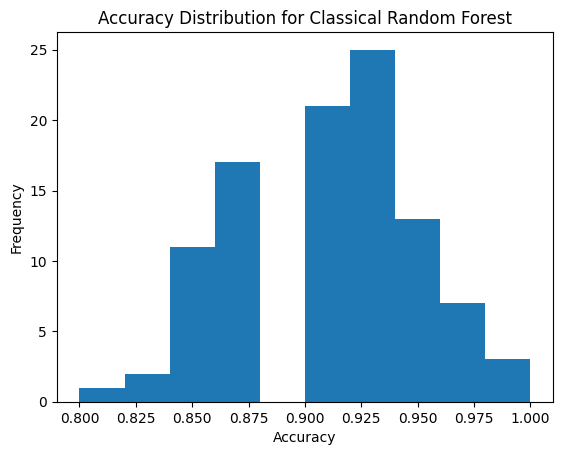

In [29]:
plt.hist(np.array(svc_acc_rf))
plt.title('Accuracy Distribution for Classical Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [30]:
print(svc_bacc_rf)
print("For Classical Random Forest:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc_rf).mean())
print("Standard deviation:  ", np.array(svc_bacc_rf).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc_rf).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc_rf).max())
svc_avg = np.array(svc_bacc_rf).mean()
svc_min = np.array(svc_bacc_rf).min()
svc_max = np.array(svc_bacc_rf).max()

[0.9194373401534527, 0.9285714285714286, 0.899749373433584, 0.9375, 0.9270833333333333, 0.875, 0.925, 0.8863636363636364, 0.9, 0.8533333333333333, 0.9217171717171717, 0.8913043478260869, 0.8869047619047619, 0.9066666666666667, 0.8636363636363636, 0.8695652173913043, 0.9270833333333333, 0.8933333333333333, 0.8611111111111112, 0.8542199488491049, 0.899749373433584, 0.9245014245014245, 0.9772727272727273, 0.9267676767676767, 0.8533333333333333, 0.844611528822055, 0.8351648351648351, 0.9194373401534527, 0.9736842105263157, 0.9235588972431077, 0.9583333333333333, 0.8535353535353536, 0.9235588972431077, 0.9583333333333333, 0.9705882352941176, 0.9090909090909092, 0.9093406593406593, 0.9473684210526316, 0.9245014245014245, 1.0, 0.9565217391304348, 0.9053708439897699, 0.9053708439897699, 0.8645833333333333, 0.8734335839598997, 0.925, 0.8465473145780051, 0.9053708439897699, 0.898989898989899, 0.8759398496240601, 0.76, 0.9565217391304348, 0.8682864450127876, 0.9466666666666667, 0.9235588972431077

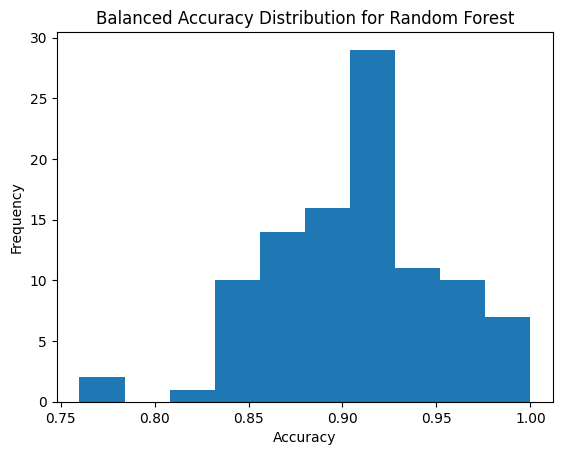

In [31]:
plt.hist(np.array(svc_bacc_rf))
plt.title('Balanced Accuracy Distribution for Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [32]:
def find_closest_to_mean(arr):
    mean = sum(arr) / len(arr)  # Calculate mean of the list

    # Calculate the differences between each element and the mean, and store them in a tuple with their index
    diff_indices = [(abs(x - mean), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [33]:
def find_closest_to_max(arr):
    max_val = max(arr)  # Calculate max of the list

    # Calculate the differences between each element and the max, and store them in a tuple with their index
    diff_indices = [(abs(x - max_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [34]:
def find_closest_to_min(arr):
    min_val = min(arr)  # Calculate min of the list

    # Calculate the differences between each element and the min, and store them in a tuple with their index
    diff_indices = [(abs(x - min_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [35]:
fm_list = []
names_fm = []
def create_feature_maps(features_):
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z XY')


In [36]:
create_feature_maps(7)

In [37]:
def train_and_fit_model(x_train_, x_test_, y_train_, y_test_, fm_):

    start = time.time()

    # Building Kernel
    dse_feature_map = fm_

    dse_backend = QuantumInstance(
        Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=12345, seed_transpiler=12345
    )

    dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
    qsvc = QSVC(quantum_kernel=dse_kernel)
    qsvc.fit(x_train_, y_train_)

    # Predict the labels
    labels_test = qsvc.predict(x_test_)

    accuracy_test = metrics.accuracy_score(y_true=y_test_, y_pred=labels_test)
    ba_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_test)
    q_f1_score = f1_score(y_test_, labels_test)

    elapsed = time.time() - start

    return accuracy_test, ba_score, q_f1_score, elapsed

In [38]:
! pip install qiskit-aer

In [40]:
print("For Mean Performance: ")
indices_mean = find_closest_to_mean(svc_bacc)
print(indices_mean)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_mean:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Mean Performance: 
[0, 1]
Traceback (most recent call last):
  Cell In[40], line 14
    acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
  Cell In[37], line 8 in train_and_fit_model
    dse_backend = QuantumInstance(
NameError: name 'QuantumInstance' is not defined

Use %tb to get the full traceback.


In [ ]:
print('Oishik')

In [ ]:
print("For Min Performance ")
indices_min = find_closest_to_min(svc_bacc)
print(indices_min)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_min:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

In [ ]:
print("For Max Performance ")
indices_max = find_closest_to_max(svc_bacc)
print(indices_max)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_max:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")